In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings

# Seaborn default configuration
sns.set_style("darkgrid")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# filter all warnings
warnings.filterwarnings('ignore') 

# set max column to 999 for displaying in pandas
pd.options.display.max_columns=999 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os



In [8]:
data = pd.read_csv('E:\Iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 6


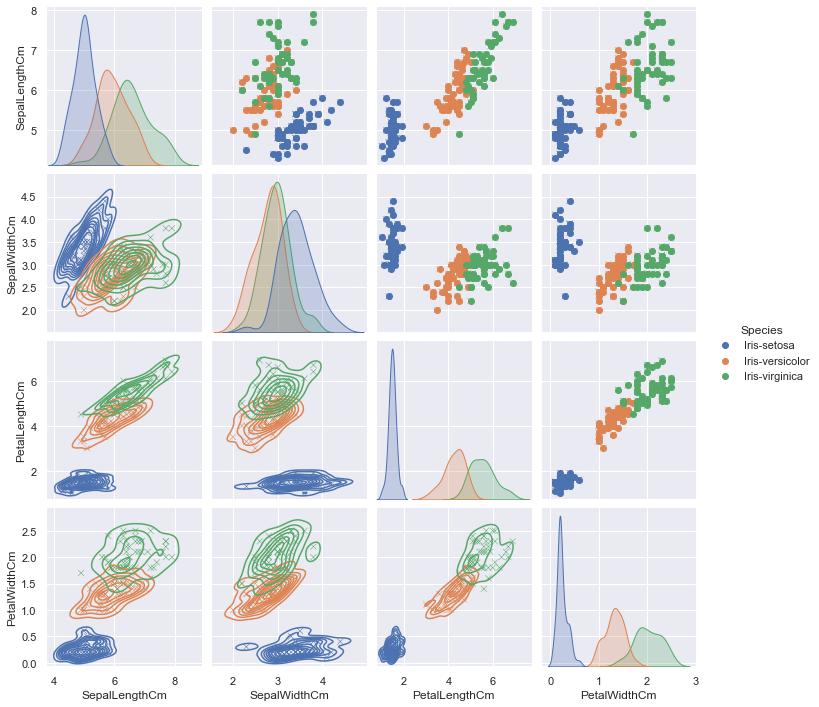

In [12]:
snsdata = data.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

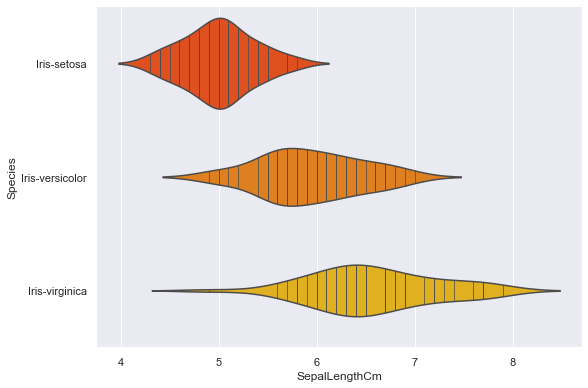

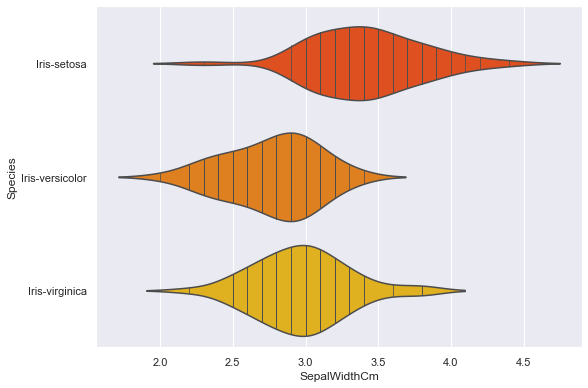

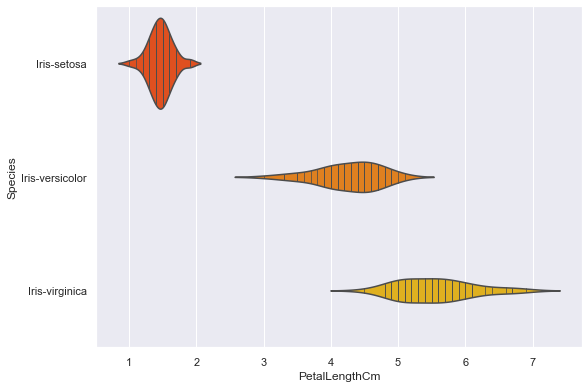

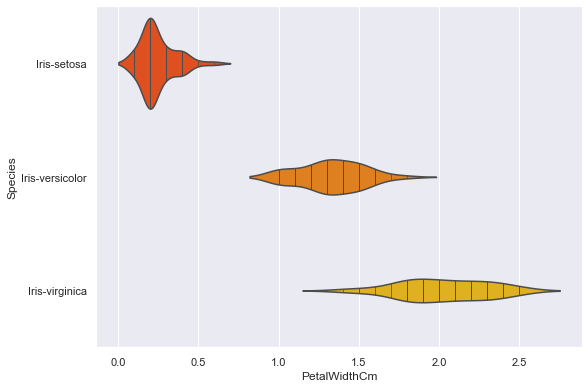

In [13]:
sns.violinplot(x='SepalLengthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=data, inner='stick', palette='autumn')
plt.show()

In [15]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = data.drop(['Id', 'Species'], axis=1).values # Input Feature Values
y = data.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bia

In [16]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [17]:
iteration = 10000
learning_rate = 0.003 # If you are going by formula, this is actually alpha.
J = np.zeros(iteration) # 1 x 10000 maxtix

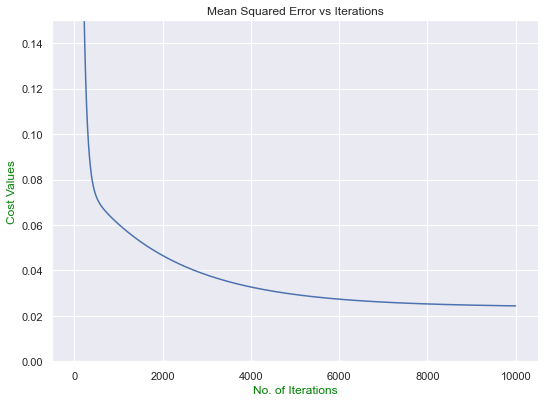

In [18]:
# Let's train our model to compute values of theta
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

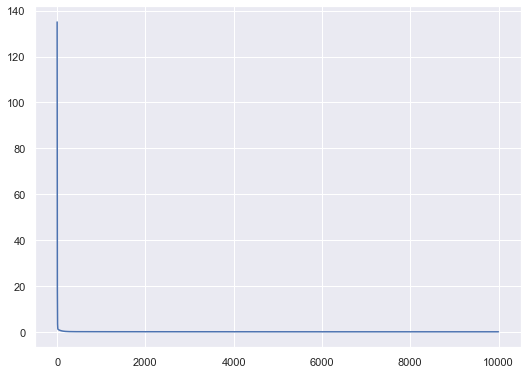

In [19]:
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.show()

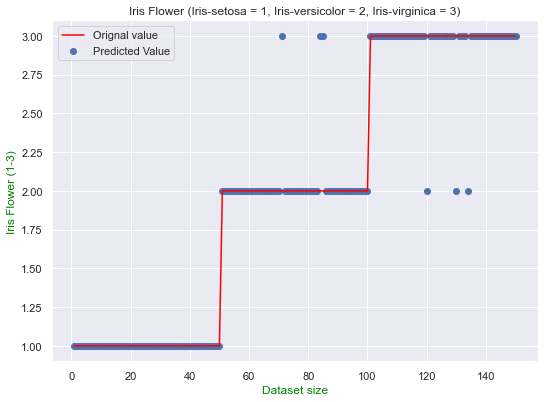

In [20]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()